# WORK IN PROGRESS!!!
**This notebook is not ready** but if you wan't to look at the mess below, then go ahead.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
from numpy import arange
import wikipedia
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

In [3]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = pd.read_csv('imports-85.data', names=cols)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [5]:
df.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Initial observations:
* we're managing a fairly small dataset - we should try to avoid removing rows
* we can see missing values replaced with '?' sign
* some columns which seem numeric are not numeric at all - this is probably due to storing missing values as '?'

In [6]:
numeric_cols = ['normalized_losses', 'price', 'bore', 'stroke', 'horsepower', 'peak_rpm',]
df[numeric_cols] = np.where(df[numeric_cols] == '?', '', df[numeric_cols])

In [7]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [8]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [9]:
df[df.columns[df.isna().any()]].isna().sum()

normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

# We have some missing values - instead of applying 1 method to a single dataframe, we'll create 6 different dataframes:
* numeric_a - where we've dropped rows without the price value, and filled the remaining empty cells with avg values for their columns
* numeric_b - in this df we've dropped rows empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', 'price', the remaining empty cells were  filled with avg values for their columns
* numeric_c - we've dropped empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', then **we took special care filling in the missing values in price column**, the remaining empty cells(normalized losses) were  filled with avg values for their columns

We've alsor created normalized versions of the above dataframes: numeric_a_n, numeric_b_n, numeric_c_n

In [10]:
numeric = df.loc[:, df.dtypes != object].copy()

In [11]:
numeric_a = numeric.dropna(subset = ['price']).copy()
numeric_a = numeric_a.fillna(numeric.mean())

numeric_b = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']).copy()
numeric_b = numeric_b.fillna(numeric_b.mean())


In [12]:
corr_df = numeric_a.corr()['price'].to_frame().merge(numeric_b.corr()['price'], 
                                           left_index=True, right_index=True, suffixes=['_A_corr', '_B_corr'])
corr_df.sort_values('price_A_corr')

,price_A_corr,price_B_corr
highway_mpg,-0.704692,-0.715590
city_mpg,-0.686571,-0.702685
peak_rpm,-0.101616,-0.104333
symboling,-0.082391,-0.084118
compression_rate,0.071107,0.069500
stroke,0.082269,0.093746
normalized_losses,0.133999,0.131736
height,0.135486,0.138291
bore,0.543155,0.546873
wheel_base,0.584642,0.585793


# we're expecting engine_size column to have the biggest impact on price predictions

# Is it worth doing all the extra work filling in the missing price values?

In [13]:
numeric_c = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm']).copy()

In numeric a and b dataframes we've filled in the missing values, using the mean value for the column. Very simplistic aproach that we're going to modify and upgrade for the dataframe numeric_c. We've checked corelation values for the price column( that's what we're after eventually). Column engine_size has the highest corelation value. That is why we're going to use that column to decide with what values we should be filling in the price column:
* We'll divide the engine_size values into 20 bins
* we'll assign the price value to our missing rows depending on its engine size

In [14]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [15]:
bins = numeric_c['engine_size'].value_counts(bins=20).index
numeric_c.groupby(pd.cut(numeric_c.engine_size, bins=bins))['price'].mean()

engine_size
(87.5, 100.75]      7265.948276
(100.75, 114.0]     9754.628571
(114.0, 127.25]    11619.034483
(140.5, 153.75]    15516.047619
(127.25, 140.5]    17510.142857
(180.25, 193.5]    21027.000000
(153.75, 167.0]    16678.333333
(193.5, 206.75]    34528.000000
(167.0, 180.25]    17432.750000
(206.75, 220.0]    36318.333333
(233.25, 246.5]    34620.000000
(299.5, 312.75]    43180.000000
(246.5, 259.75]    33900.000000
(60.734, 74.25]     5151.000000
(74.25, 87.5]       5399.000000
(312.75, 326.0]    36000.000000
(220.0, 233.25]             NaN
(259.75, 273.0]             NaN
(273.0, 286.25]             NaN
(286.25, 299.5]             NaN
Name: price, dtype: float64

In [16]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [17]:
numeric_c.loc[9,'price'] = 16520.750000
numeric_c.loc[44,'price'] = 7265.948276
numeric_c.loc[45,'price'] = 7265.948276
numeric_c.loc[129,'price'] = 34528.000000

In [18]:
numeric_c[numeric_c.columns[numeric_c.isna().any()]].isna().sum()

normalized_losses    39
dtype: int64

In [19]:
numeric_c = numeric_c.fillna(numeric_c.mean())

In [20]:
def spines(ax):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    return x1, x2, x3, x4

def spines2():
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(3)
    x4 = ax.spines['bottom'].set_linewidth(3)
    return x1, x2, x3, x4

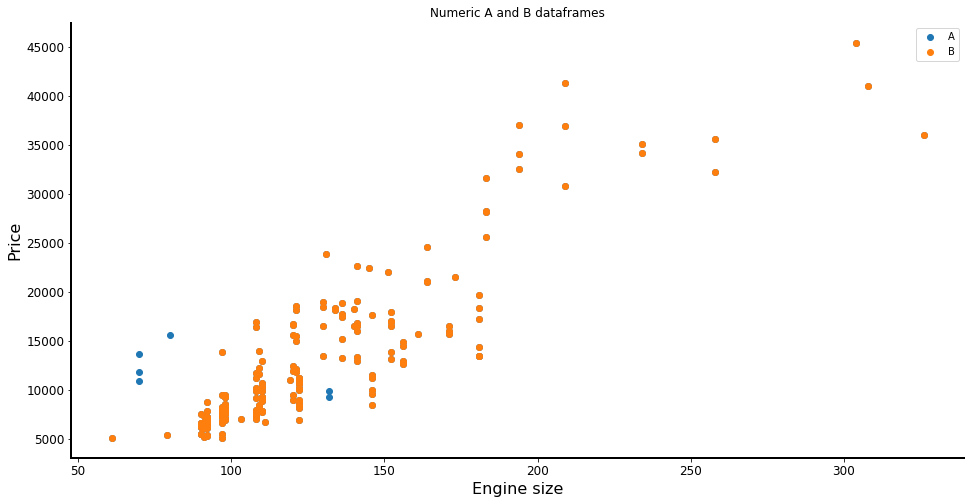

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=numeric_a, x='engine_size', y='price', label='A')
plt.scatter(data=numeric_b, x='engine_size', y='price', label= 'B')
# plt.scatter(data=numeric_c, x='engine_size', y='price', label= 'C')
plt.legend()
plt.title('Numeric A and B dataframes')
plt.xlabel('Engine size', size=16)
plt.ylabel('Price',  size=16)

for location in [ 'right', 'top']:
        ax.spines[location].set_visible(False)
for location in [ 'left', 'bottom']:
        ax.spines[location].set_linewidth(2)
ax.tick_params(labelsize=12)

# ax.set_xlabel('Year',size=15)
plt.show()

In [22]:
price_col = numeric_a['price']
numeric_a_n = (numeric_a - numeric_a.min())/(numeric_a.max() - numeric_a.min()).copy()
numeric_a_n['price'] = price_col

price_col = numeric_b['price']
numeric_b_n = (numeric_b - numeric_b.min())/(numeric_b.max() - numeric_b.min()).copy()
numeric_b_n['price'] = price_col

price_col = numeric_c['price']
numeric_c_n = (numeric_c - numeric_c.min())/(numeric_c.max() - numeric_c.min()).copy()
numeric_c_n['price'] = price_col

# which columns?

In [23]:
def knn_train_test(df, feature_col, target_col):
    # randomize
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    # train and predict
    knn = KNeighborsRegressor()
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [24]:
all_features = numeric.columns.tolist()
all_features.remove('price')

rmse_dict_a = {}
rmse_dict_b = {}
rmse_dict_c = {}
for col in all_features:
    rmse_dict_a[col] = knn_train_test(numeric_a, col, 'price')
for col in all_features:
    rmse_dict_b[col] = knn_train_test(numeric_b, col, 'price')
for col in all_features:
    rmse_dict_c[col] = knn_train_test(numeric_c, col, 'price')

rmse_dict_a= dict(sorted(rmse_dict_a.items(), key=lambda item: item[1]))
rmse_dict_b = dict(sorted(rmse_dict_b.items(), key=lambda item: item[1]))
rmse_dict_c = dict(sorted(rmse_dict_c.items(), key=lambda item: item[1]))

results_a = pd.DataFrame.from_dict(rmse_dict_a, orient='index')
results_b = pd.DataFrame.from_dict(rmse_dict_b, orient='index')
results_c = pd.DataFrame.from_dict(rmse_dict_c, orient='index')

results_frame = results_a.merge(results_b, left_index=True, right_index=True, suffixes=['_numeric_A', '_numeric_B'])
results_frame2 = results_frame.merge(results_c, left_index=True, right_index=True)
results_frame2 = results_frame2.rename(columns={results_frame2.columns[0]: 'numeric_a', results_frame2.columns[1]: 'numeric_b', 
                              results_frame2.columns[2]: 'numeric_c'
                              })
results_frame2

,numeric_a,numeric_b,numeric_c
engine_size,3271.449938,4206.269209,3014.293169
horsepower,4064.464572,4543.317619,4441.723870
curb_weight,4445.141920,4594.629028,3667.924168
highway_mpg,4643.046278,4368.230464,4139.949639
city_mpg,4760.449842,4440.237523,4717.122297
width,4772.459149,5038.643838,4290.488430
length,5428.810101,5212.513611,6186.265681
wheel_base,5460.851458,5692.794469,6121.214509
compression_rate,6610.812153,7020.882648,6210.718457
bore,6778.637424,7225.667155,7590.625100


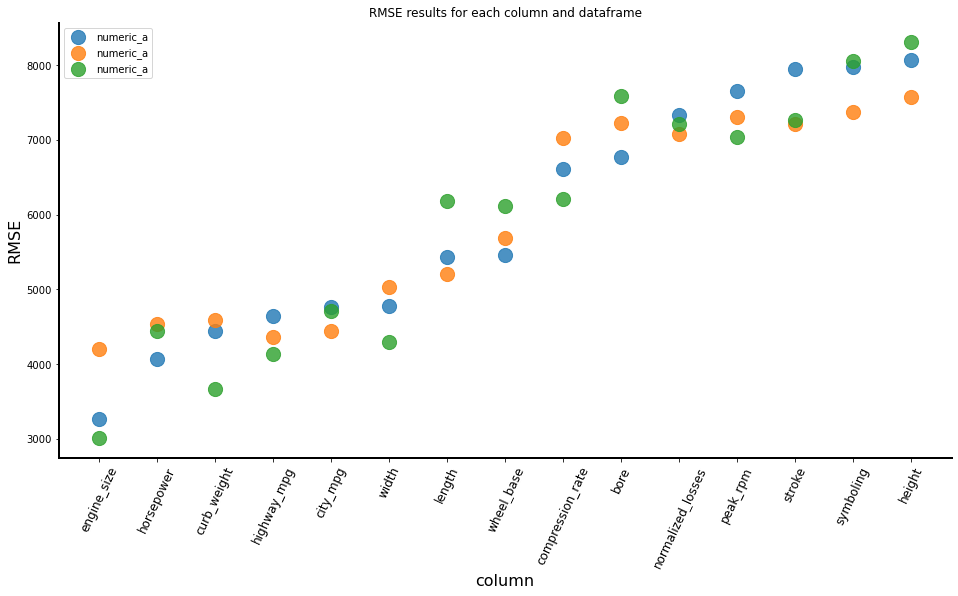

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter( x=results_frame2.index, y=results_frame2['numeric_a'] ,label='numeric_a', s=200, alpha=0.8)
plt.scatter( x=results_frame2.index, y=results_frame2['numeric_b'] ,label='numeric_a', s=200, alpha=0.8)
plt.scatter( x=results_frame2.index, y=results_frame2['numeric_c'] ,label='numeric_a', s=200, alpha=0.8)
spines(ax)
ax.tick_params(axis = 'x',labelsize=12, rotation=65)
plt.legend(loc=2)
plt.xlabel('column', size=16)
plt.ylabel('RMSE',  size=16)
plt.title('RMSE results for each column and dataframe')
plt.show()


# Observations:
* taking extra care with filling in missing price values in dataframe 'numeric_c' paid of
* as expected 'engine_size' column delivers the best results (lowest rmse)
* big difference between numeric a and b is looks odd, we'll try a different arrangement of indexes:

# random seed and normalized or not? 

In [26]:
def knn_train_test_v2(df, feature_col, target_col, n):
    
    # randomize 
    np.random.seed(n)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # train and test 
    knn = KNeighborsRegressor()
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [27]:
df_list = [numeric_a, numeric_b, numeric_c]
results = []
def df_seed_check(df_list, col_name,n):
    best_results = []
#     results = []
    for df in df_list:
        seed_dictionary = {}
        for i in list(range(0,n)):
            seed_dictionary[i] = knn_train_test_v2(df,col_name, 'price', i)
#             results.append(min(seed_dictionary.items(), key=lambda x: x[1])) 
            results.append(seed_dictionary[i])
            
        best_results.append(min(seed_dictionary.items(), key=lambda x: x[1]))   
    return best_results

In [28]:
# check rmse results for random seed 0-10 and 0-1000
nums = pd.DataFrame([df_seed_check(df_list,'horsepower',10),
             df_seed_check(df_list,'curb_weight',10),
              df_seed_check(df_list,'engine_size',10),
              df_seed_check(df_list,'horsepower',1000),
              df_seed_check(df_list,'curb_weight',1000), df_seed_check(df_list,'engine_size',1000)
             ], 
             columns=('numeric A','numeric B','numeric C'), index=('horsepower 10 seeds',
                                                                   'curb_weight 10 seeds',
                                                                   'engine_size 10 seeds',
                                                                  'horsepower 1000 seeds',
                                                                  'curb_weight 1000 seeds',
                                                                   'engine_size 1000 seeds'
                                                                  ))

nums

,numeric A,numeric B,numeric C
horsepower 10 seeds,"(3, 3741.7302132188593)","(7, 3958.9520200607203)","(3, 3782.1773239485788)"
curb_weight 10 seeds,"(0, 3787.561329791334)","(3, 3909.7204880520394)","(1, 3667.9241682927845)"
engine_size 10 seeds,"(0, 3205.3630293773294)","(5, 2981.0871157745014)","(7, 2827.3963605665767)"
horsepower 1000 seeds,"(882, 2927.69420919847)","(128, 2773.6407302331286)","(251, 3022.0747740540983)"
curb_weight 1000 seeds,"(982, 3065.7514839895553)","(426, 2871.5644242205294)","(252, 3296.6267655401803)"
engine_size 1000 seeds,"(788, 2497.602611218277)","(289, 2469.6304606650965)","(788, 2357.8562423336266)"


In [29]:
# check rmse results for random seed 0-10 and 0-1000 in normalized dataframes:
df_n_list = [numeric_a_n, numeric_b_n, numeric_c_n]
nums_n = pd.DataFrame([df_seed_check(df_n_list,'horsepower',10),
             df_seed_check(df_n_list,'curb_weight',10),
              df_seed_check(df_n_list,'engine_size',10),
              df_seed_check(df_n_list,'horsepower',1000),
              df_seed_check(df_n_list,'curb_weight',1000), df_seed_check(df_n_list,'engine_size',1000)
             ], 
             columns=('numeric A normalized','numeric B normalized','numeric C normalized'), index=('horsepower 10 seeds',
                                                                   'curb_weight 10 seeds',
                                                                   'engine_size 10 seeds',
                                                                  'horsepower 1000 seeds',
                                                                  'curb_weight 1000 seeds',
                                                                   'engine_size 1000 seeds'
                                                                  ))
nums_n

,numeric A normalized,numeric B normalized,numeric C normalized
horsepower 10 seeds,"(3, 3742.705969093633)","(2, 4041.084857474057)","(3, 3781.715959480673)"
curb_weight 10 seeds,"(0, 3787.561329791334)","(3, 3877.064333871646)","(1, 3670.613515796278)"
engine_size 10 seeds,"(0, 3205.3630293773294)","(5, 2981.0871157745014)","(7, 2827.3963605665767)"
horsepower 1000 seeds,"(882, 2928.8650521089817)","(128, 2782.8585137133614)","(251, 3021.649260259856)"
curb_weight 1000 seeds,"(982, 3065.879225176089)","(426, 2951.4589936891502)","(252, 3296.6267655401803)"
engine_size 1000 seeds,"(788, 2497.602611218277)","(289, 2469.6304606650965)","(788, 2353.2063175828102)"


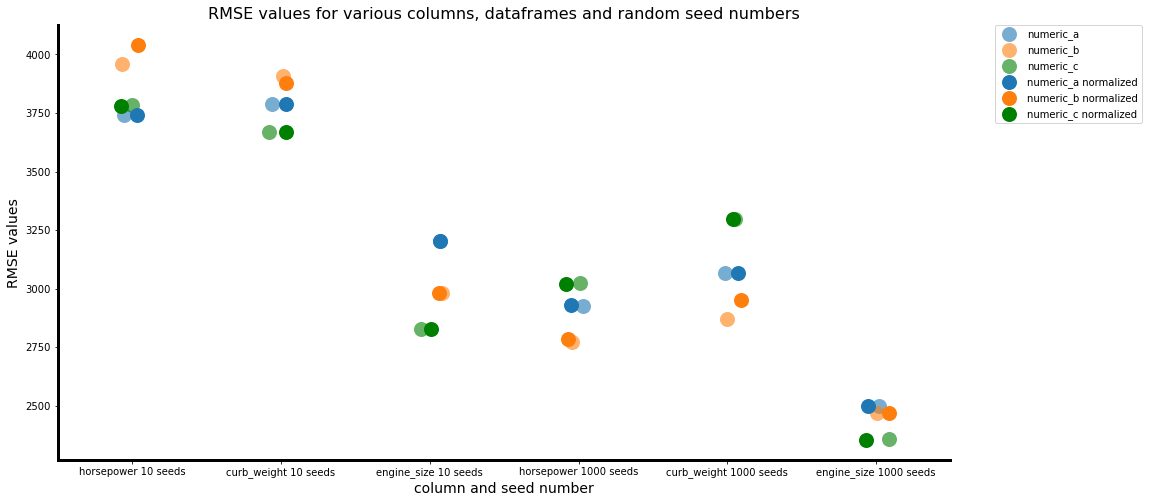

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
sns.stripplot( x=nums.index, y=nums[nums.columns[0]].str[1], s=15, color='#1f77b4',  alpha=0.6, label='numeric_a')
sns.stripplot( x=nums.index, y=nums[nums.columns[1]].str[1], s=15, color='#ff7f0e', alpha=0.6, label='numeric_b')
sns.stripplot( x=nums.index, y=nums[nums.columns[2]].str[1], s=15, color='green', alpha=0.6, label='numeric_c')
sns.stripplot( x=nums_n.index, y=nums_n[nums_n.columns[0]].str[1], s=15, color='#1f77b4', label='numeric_a normalized')
sns.stripplot( x=nums_n.index, y=nums_n[nums_n.columns[1]].str[1], s=15, color='#ff7f0e', label='numeric_b normalized')
sns.stripplot( x=nums_n.index, y=nums_n[nums_n.columns[2]].str[1], s=15, color='green', label='numeric_c normalized')

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[::6], labels[::6], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
spines2()
plt.title('RMSE values for various columns, dataframes and random seed numbers', size=16)
plt.xlabel('column and seed number', size=14)
plt.ylabel('RMSE values', size=14)
plt.show()

# it's settled then: normalized gives us a micro advantage so we'll keep it, also it's clear and obvious tha engine_size is the best col

In [31]:
print('best results for numeric_a, numeric_b and numeric_c:')
df_seed_check(df_list,'engine_size',10)

best results for numeric_a, numeric_b and numeric_c:


[(0, 3205.3630293773294), (5, 2981.0871157745014), (7, 2827.3963605665767)]

In [32]:
results = []
df_seed_check(df_list,'engine_size',1000)
num_a_results = results[:1000].copy()
num_b_results = results[1000:2000].copy()
num_c_results = results[2000:].copy()

In [33]:
results = []
df_seed_check(df_n_list,'engine_size',1000)
num_a_results_n = results[:1000].copy()
num_b_results_n = results[1000:2000].copy()
num_c_results_n = results[2000:].copy()
len(results)

3000

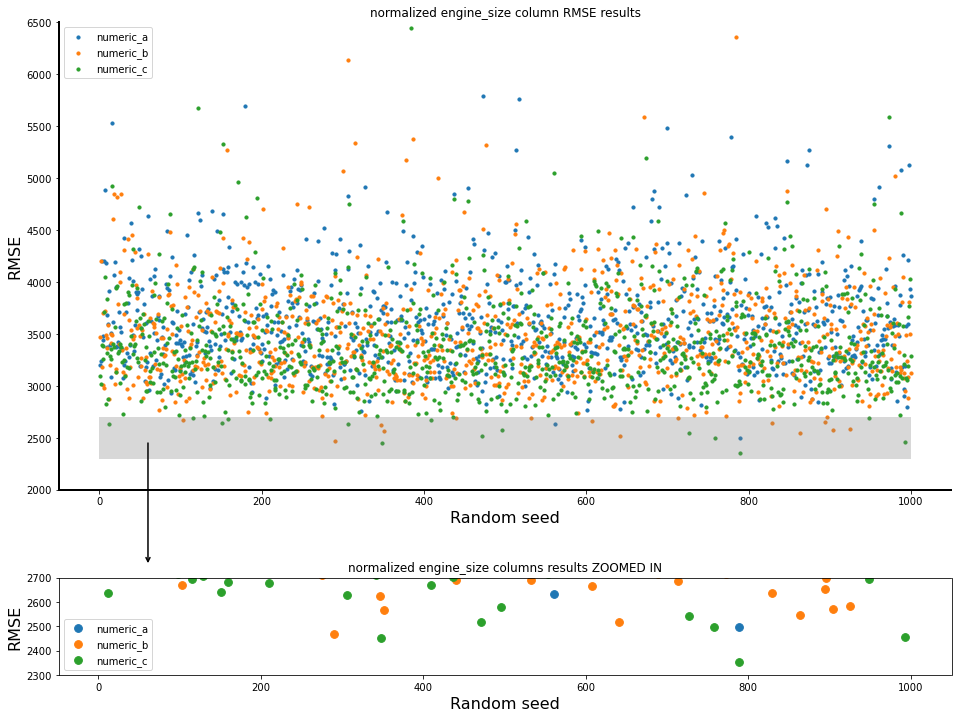

In [34]:
fig, ax = plt.subplots(figsize=(16,12))
grid = plt.GridSpec(8, 1, wspace=0, hspace=19.3)
ax1 = plt.subplot(grid[0:6, 0])
plt.scatter( x=list(range(1,1001)), y=num_a_results_n ,label='numeric_a', s=10)
plt.scatter( x=list(range(1,1001)), y=num_b_results_n ,label='numeric_b', s=10)
plt.scatter( x=list(range(1,1001)), y=num_c_results_n ,label='numeric_c', s=10)

plt.legend()
plt.title('normalized engine_size column RMSE results')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)

ax1.add_patch(Rectangle((0, 2300), 1000, 400, alpha=0.3, facecolor = 'grey'))
plt.legend(loc=2)

plt.ylim(2000,6500)
plt.arrow(2,-3000, 10,500)

ax2 = plt.subplot(grid[6:, 0])
plt.scatter( x=list(range(1,1001)), y=num_a_results_n ,label='numeric_a', s=60)
plt.scatter( x=list(range(1,1001)), y=num_b_results_n ,label='numeric_b', s=60)
plt.scatter( x=list(range(1,1001)), y=num_c_results_n ,label='numeric_c', s=60)

plt.legend()
plt.title('normalized engine_size columns results ZOOMED IN')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)
spines(ax1)
ax.tick_params(labelsize=12)
plt.ylim(2300,2700)
plt.legend(loc=3)


con = ConnectionPatch(
    # in axes coordinates
    xyA=(0.1, 0.1), coordsA=ax1.transAxes,
    # x in axes coordinates, y in data coordinates
    xyB=(0.1, 2759.7), coordsB=ax2.get_yaxis_transform(),
    arrowstyle="->", linewidth=1.5)
ax2.add_artist(con)
plt.show()

In [35]:
d = {'numeric_a': [np.mean(num_a_results), np.median(num_a_results),np.std(num_a_results)], 
     'numeric_b': [np.mean(num_b_results), np.median(num_b_results),np.std(num_b_results)], 
     'numeric_c':[np.mean(num_c_results),np.median(num_c_results),  np.std(num_c_results)],
     'numeric_a_n': [np.mean(num_a_results_n), np.median(num_a_results_n),np.std(num_a_results_n)],
     'numeric_b_n': [np.mean(num_b_results_n), np.median(num_b_results_n),np.std(num_b_results_n)],
     'numeric_c_n': [np.mean(num_c_results_n), np.median(num_c_results_n),np.std(num_c_results_n)]                  
    }
means = pd.DataFrame(data=d, index=('mean', 'median','std'))
means['avg non normalized'] = means.iloc[:,0:3].mean(axis=1)
means['avg normalized'] = means.iloc[:,3:].mean(axis=1)
means['normalized smaller'] = means['avg non normalized']> means['avg normalized']
means

,numeric_a,numeric_b,numeric_c,numeric_a_n,numeric_b_n,numeric_c_n,avg non normalized,avg normalized,normalized smaller
mean,3626.998882,3480.439640,3377.467030,3622.295660,3480.975338,3377.789533,3494.968517,3494.007262,True
median,3565.723553,3403.347687,3304.425648,3562.269532,3403.347687,3303.533751,3424.498963,3423.412483,True
std,452.944515,460.238868,436.689523,453.479499,460.259276,436.381969,449.957636,450.019595,False


In [36]:
def knn_train_test_v3(df, feature_col, target_col):
    
    # randomize 
    np.random.seed(788)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    k_list = [1, 3, 5, 7, 9]
    rmse_dict = {}   
    for k in k_list:
    # train and test 
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[feature_col]], train_set[target_col])
        predictions = knn.predict(test_set[[feature_col]])
        rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
        rmse_dict[k] = rmse

    return rmse_dict

In [37]:
knn_train_test_v3(numeric_b, 'engine_size', 'price')

{1: 3277.1469018532766,
 3: 2461.686799092321,
 5: 2928.9438425926205,
 7: 2656.232785896153,
 9: 2709.5965718649954}

In [38]:
all_features = numeric.columns.tolist()
all_features.remove('price')

# setup renaming columns:
k_list = [1, 3, 5, 7, 9]
df_names = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
col_names = []
for df in df_names:
    for k in k_list:
        col_names.append(df+'_k'+str(k))

rmse_dict_a = {}
rmse_dict_b = {}
rmse_dict_c = {}
for col in all_features:
    rmse_dict_a[col] = knn_train_test_v3(numeric_a_n, col, 'price')
for col in all_features:
    rmse_dict_b[col] = knn_train_test_v3(numeric_b_n, col, 'price')
for col in all_features:
    rmse_dict_c[col] = knn_train_test_v3(numeric_c_n, col, 'price')

# rmse_dict_a= dict(sorted(rmse_dict_a.items(), key=lambda item: item[1]))
# rmse_dict_b = dict(sorted(rmse_dict_b.items(), key=lambda item: item[1]))
# rmse_dict_c = dict(sorted(rmse_dict_c.items(), key=lambda item: item[1]))

results_a = pd.DataFrame.from_dict(rmse_dict_a, orient='index')
for n in range(len(results_a.columns)):
    results_a = results_a.rename(columns= {results_a.columns[n]: col_names[n]}) 
results_b = pd.DataFrame.from_dict(rmse_dict_b, orient='index')
for i in range(5,(len(results_b.columns)+5)):
    results_b = results_b.rename(columns= {results_b.columns[i-5]: col_names[i]}) 
results_c = pd.DataFrame.from_dict(rmse_dict_c, orient='index')
for i in range(10,(len(results_c.columns)+10)):
    results_c = results_c.rename(columns= {results_c.columns[i-10]: col_names[i]}) 

results_frame = results_a.merge(results_b, left_index=True, right_index=True)
results_frame2 = results_frame.merge(results_c, left_index=True, right_index=True)
# results_frame2 = results_frame2.rename(columns={results_frame2.columns[0]: 'numeric_a', results_frame2.columns[1]: 'numeric_b', 
#                               results_frame2.columns[2]: 'numeric_c'})
results_frame2


,numeric_a_n_k1,numeric_a_n_k3,numeric_a_n_k5,numeric_a_n_k7,numeric_a_n_k9,numeric_b_n_k1,numeric_b_n_k3,numeric_b_n_k5,numeric_b_n_k7,numeric_b_n_k9,numeric_c_n_k1,numeric_c_n_k3,numeric_c_n_k5,numeric_c_n_k7,numeric_c_n_k9
symboling,10555.011307,11266.073521,9139.925251,7705.465066,6984.723728,8879.833790,7166.319268,7572.687586,7150.692028,7205.104875,15390.939574,8445.989152,7401.701593,7020.331422,7205.892343
normalized_losses,6817.911144,6685.536154,6565.157661,7142.670998,6800.933103,6097.597946,6775.563532,7036.280158,6581.770406,6734.059696,7406.558677,7238.314716,7899.939719,8134.057136,8363.491893
wheel_base,4507.039788,4958.900500,5692.399245,5518.370755,5650.010375,4102.025336,3807.512273,5420.347821,5239.365461,5224.027154,3890.949095,5730.080848,5928.061398,5981.879923,6107.644102
length,4177.073283,4424.271077,5248.787424,5348.244491,4935.329760,5612.168989,5411.432825,4642.182450,4491.043914,4132.795706,4870.269269,5401.313651,5097.049296,5082.216636,5205.273251
width,4124.807424,3425.909636,3127.931827,3194.559820,3280.133327,3945.691722,3880.738131,3924.483420,3559.970342,3447.442624,4279.114585,4193.853006,4324.021786,4390.805737,4511.944398
height,11577.219893,8847.078330,7769.183762,7231.639613,7185.097449,9661.932240,7376.701190,7295.291201,7036.614783,7119.238477,9804.521205,7753.477529,7952.288599,7695.623106,7663.820089
curb_weight,5189.272676,3701.758307,3711.471033,3722.399033,3669.062666,5893.477270,4406.259213,4269.753672,4120.374385,3798.835472,4531.735536,3932.259907,3890.354246,3961.053369,3775.880792
engine_size,2993.611979,2420.576413,2497.602611,2781.943187,2806.019104,3277.146902,2461.686799,2928.943843,2656.232786,2729.280876,2693.041898,2408.662738,2353.206318,2765.514027,3005.716816
bore,6532.244670,5903.756404,6433.337847,7210.441640,6515.604834,10662.527910,8622.032236,7476.193227,6978.116219,6282.645610,6480.936018,5944.641569,5965.864590,5925.297530,5927.482422
stroke,6345.925578,6628.753130,6566.996247,6862.048056,6839.783321,7193.583458,7274.059233,6679.461391,6576.277472,6721.032815,6478.113359,6154.788515,6424.950616,6890.144968,7237.566469


In [57]:
results_frame2.plot(
    kind='scatter',
    y=results_frame2.index, 
    x=results_frame2.columns, 
    backend='plotly'     
)

In [50]:
results_frame2.index

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')

In [46]:
results_frame2.columns

Index(['numeric_a_n_k1', 'numeric_a_n_k3', 'numeric_a_n_k5', 'numeric_a_n_k7',
       'numeric_a_n_k9', 'numeric_b_n_k1', 'numeric_b_n_k3', 'numeric_b_n_k5',
       'numeric_b_n_k7', 'numeric_b_n_k9', 'numeric_c_n_k1', 'numeric_c_n_k3',
       'numeric_c_n_k5', 'numeric_c_n_k7', 'numeric_c_n_k9'],
      dtype='object')